# Doğrusal Olmayan Regresyon Modelleri

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

# KNN

In [2]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [3]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [4]:
knn_model

KNeighborsRegressor()

In [5]:
knn_model.n_neighbors

5

# Tahmin

In [6]:
y_pred = knn_model.predict(X_test)

In [7]:
np.sqrt(mean_squared_error(y_test, y_pred))

426.6570764525201

In [8]:
RMSE = []

for k in range(10):
    k = k + 1
    knn_model = KNeighborsRegressor(n_neighbors=k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train)
    rmse = np.sqrt(mean_squared_error(y_train, y_pred))
    RMSE.append(rmse)
    print("k =", k, "için RMSE değeri: ", rmse)

k = 1 için RMSE değeri:  0.0
k = 2 için RMSE değeri:  179.52761335480352
k = 3 için RMSE değeri:  205.20157172291863
k = 4 için RMSE değeri:  220.5139794876305
k = 5 için RMSE değeri:  239.6467132541376
k = 6 için RMSE değeri:  243.5904190007242
k = 7 için RMSE değeri:  258.1478781634636
k = 8 için RMSE değeri:  266.05374203349805
k = 9 için RMSE değeri:  269.73782093553376
k = 10 için RMSE değeri:  271.2798300436963


# Model Tuning

In [9]:
knn_params = {'n_neighbors' : np.arange(1,30,1)}

In [10]:
knn = KNeighborsRegressor()

In [11]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)

In [12]:
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [13]:
knn_cv_model.best_params_["n_neighbors"]

8

In [14]:
RMSE = []
RMSE_CV = []

for k in range(10):
    k = k + 1
    knn_model = KNeighborsRegressor(n_neighbors=k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train)
    rmse = np.sqrt(mean_squared_error(y_train, y_pred))
    rmse_cv = np.sqrt(-1*cross_val_score(knn_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error").mean())
    
    RMSE.append(rmse)
    RMSE_CV.append(rmse_cv)
    print("k =", k, "için RMSE değeri: ", rmse, "RMSE_CV değeri: ", rmse_cv)

k = 1 için RMSE değeri:  0.0 RMSE_CV değeri:  325.3947514706382
k = 2 için RMSE değeri:  179.52761335480352 RMSE_CV değeri:  293.24000183333817
k = 3 için RMSE değeri:  205.20157172291863 RMSE_CV değeri:  283.7486667487823
k = 4 için RMSE değeri:  220.5139794876305 RMSE_CV değeri:  286.3240222024089
k = 5 için RMSE değeri:  239.6467132541376 RMSE_CV değeri:  290.0705466132226
k = 6 için RMSE değeri:  243.5904190007242 RMSE_CV değeri:  298.1263115575851
k = 7 için RMSE değeri:  258.1478781634636 RMSE_CV değeri:  294.77070479194987
k = 8 için RMSE değeri:  266.05374203349805 RMSE_CV değeri:  291.98672028891235
k = 9 için RMSE değeri:  269.73782093553376 RMSE_CV değeri:  295.7162739573105
k = 10 için RMSE değeri:  271.2798300436963 RMSE_CV değeri:  301.31047022701154


In [15]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"])

In [16]:
knn_tuned.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=8)

In [17]:
np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test)))

413.7094731463598

# SVR(Destek Vektör Regresyonu)

In [18]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [19]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [20]:
from sklearn.svm import SVR

In [21]:
svr_model = SVR(kernel="linear").fit(X_train, y_train)

In [22]:
svr_model.predict(X_train)[0:5]

array([403.52804878, 666.91219512, 706.66829268, 194.80853659,
       423.40609756])

In [23]:
print("y = {0} + {1} x".format(svr_model.intercept_[0], svr_model.coef_[0][0]))

y = -48.69756097561513 + 4.969512195122206 x


In [24]:
X_train["Hits"][0:1]

183    91.0
Name: Hits, dtype: float64

In [25]:
-48.69756097561513 + 4.969512195122206*91

403.5280487805056

In [26]:
y_pred = svr_model.predict(X_train)

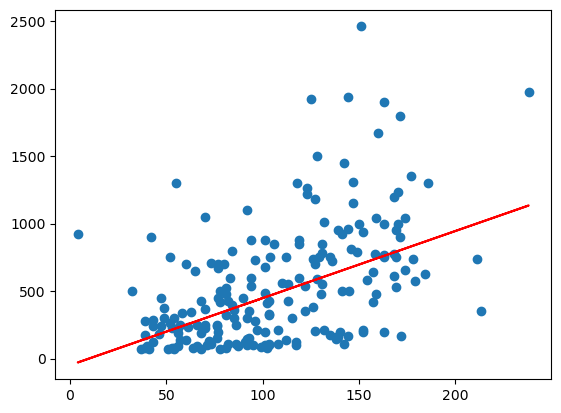

In [27]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred, color = "r");

In [28]:
from sklearn.linear_model import LinearRegression
lm_model = LinearRegression().fit(X_train, y_train)
lm_pred = lm_model.predict(X_train)
print("y = {0} + {1}".format(lm_model.intercept_, lm_model.coef_[0]))

y = -8.814095480334572 + 5.1724561354706875


In [29]:
-8.814095480334572 + 5.1724561354706875*91

461.879412847498

Burada Lineer modelin çizgisinin SVR'a göre daha yukarda olduğu gözleniyor.
Bunun sebebi aykırı gözlemlerin SVR'yi daha az etkilemesidir.

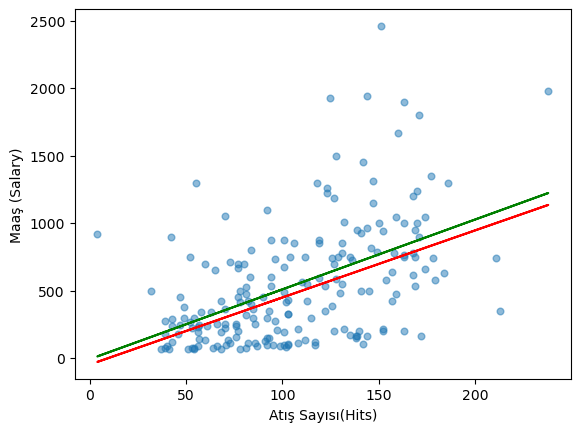

In [30]:
plt.scatter(X_train, y_train, alpha=0.5, s = 23)
plt.plot(X_train, lm_pred, 'g')
plt.plot(X_train, y_pred, color = 'r')

plt.xlabel("Atış Sayısı(Hits)")
plt.ylabel("Maaş (Salary)");

# Tahmin

In [31]:
print("y = {0} + {1} x".format(svr_model.intercept_[0], svr_model.coef_[0][0]))

y = -48.69756097561513 + 4.969512195122206 x


In [32]:
svr_model.predict([[91]])

C:\Users\Taha\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


array([403.52804878])

In [33]:
y_pred = svr_model.predict(X_test)

In [34]:
np.sqrt(mean_squared_error(y_test, y_pred))

459.0187960365147

In [35]:
svr_model

SVR(kernel='linear')

# Model Tuning

In [36]:
svr_model

SVR(kernel='linear')

In [37]:
svr_params = {"C": np.arange(0.1, 2, 0.1)}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 10).fit(X_train, y_train)

In [38]:
pd.Series(svr_cv_model.best_params_)[0]

0.1

In [39]:
svr_tuned = SVR(kernel="linear", C=pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)

In [40]:
y_pred = svr_tuned.predict(X_test)

In [41]:
np.sqrt(mean_squared_error(y_test, y_pred))

458.198966781116

# Doğrusal Olmayan SVR

In [42]:
np.random.seed(3)

x_sim = np.random.uniform(2, 10, 145)
y_sim = np.sin(x_sim) + np.random.normal(0, 0.4, 145)

x_outliers = np.arange(2.5, 5, 0.5)
y_outliers = -5*np.ones(5)

x_sim_idx = np.argsort(np.concatenate([x_sim, x_outliers]))
x_sim = np.concatenate([x_sim, x_outliers])[x_sim_idx]
y_sim = np.concatenate([y_sim, y_outliers])[x_sim_idx]

In [43]:
from sklearn.linear_model import LinearRegression
ols = LinearRegression()
ols.fit(np.sin(x_sim[:, np.newaxis]), y_sim)
ols_pred = ols.predict(np.sin(x_sim[:, np.newaxis]))

from sklearn.svm import SVR
eps = 0.1
svr = SVR(kernel='rbf', epsilon = eps)
svr.fit(x_sim[:, np.newaxis], y_sim)
svr_pred = svr.predict(x_sim[:, np.newaxis])

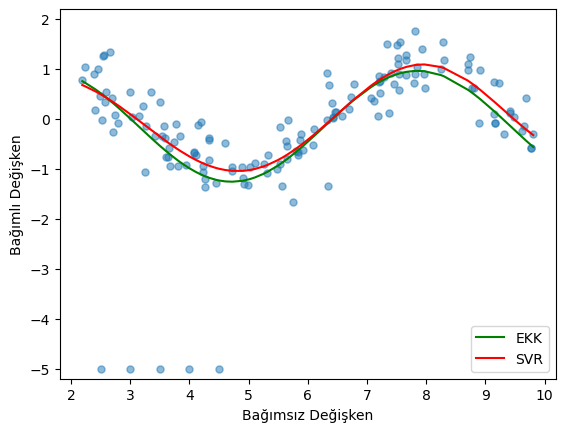

In [44]:
plt.scatter(x_sim, y_sim, alpha = 0.5, s = 26)
plt_ols, = plt.plot(x_sim, ols_pred, 'g')
plt_svr, = plt.plot(x_sim, svr_pred, color = 'r')
plt.xlabel("Bağımsız Değişken")
plt.ylabel("Bağımlı Değişken")
plt.ylim(-5.2, 2.2)
plt.legend([plt_ols, plt_svr], ['EKK', 'SVR'], loc = 4);

In [45]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [46]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [47]:
cart_model = DecisionTreeRegressor(max_leaf_nodes=10)

In [48]:
cart_model

DecisionTreeRegressor(max_leaf_nodes=10)

In [49]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=10)

C:\Users\Taha\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


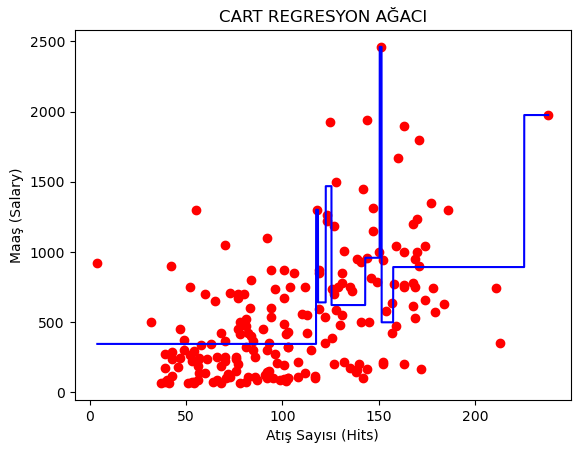

In [50]:
X_grid = np.arange(min(np.array(X_train)), max(np.array(X_train)), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_grid, cart_model.predict(X_grid), color = 'blue')
plt.title('CART REGRESYON AĞACI')
plt.xlabel('Atış Sayısı (Hits)')
plt.ylabel('Maaş (Salary)');

In [51]:
!pip install skompiler
!pip install astor

In [52]:
from skompiler import skompile

In [53]:
print(skompile(cart_model.predict).to('python/code'))

(345.2011551724138 if x[0] <= 117.5 else ((((1300.0 if x[0] <= 118.5 else 
    641.0) if x[0] <= 122.5 else 1468.5236666666667) if x[0] <= 125.5 else 
    621.9679230769232) if x[0] <= 143.0 else (958.6111111111111 if x[0] <= 
    150.5 else 2460.0) if x[0] <= 151.5 else 499.1666666666667 if x[0] <= 
    157.5 else 892.5402413793104) if x[0] <= 225.5 else 1975.0)



# Tahmin

In [54]:
x = [91]

In [55]:
(345.2011551724138 if x[0] <= 117.5 else ((((1300.0 if x[0] <= 118.5 else 
    641.0) if x[0] <= 122.5 else 1468.5236666666667) if x[0] <= 125.5 else 
    621.9679230769232) if x[0] <= 143.0 else (958.6111111111111 if x[0] <= 
    150.5 else 2460.0) if x[0] <= 151.5 else 499.1666666666667 if x[0] <= 
    157.5 else 892.5402413793104) if x[0] <= 225.5 else 1975.0)

345.2011551724138

In [56]:
cart_model.predict(X_test)[0:5]

array([621.96792308, 958.61111111, 621.96792308, 345.20115517,
       345.20115517])

In [57]:
cart_model.predict([[91]])

C:\Users\Taha\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([345.20115517])

In [58]:
y_pred = cart_model.predict(X_test)

In [59]:
np.sqrt(mean_squared_error(y_test, y_pred))

486.34593105235456

# Model Tuning

In [60]:
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)

In [61]:
np.sqrt(mean_squared_error(y_test, y_pred))

468.49579052913884

In [62]:
cart_params = {"min_sample_split": range(2,20), "max_leaf_nodes": range(2,10)}

In [63]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv=10)

# Bagged Trees Regresyon

In [64]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [65]:
bag_model = BaggingRegressor(bootstrap_features=True)
bag_model.fit(X_train, y_train)

BaggingRegressor(bootstrap_features=True)

In [66]:
bag_model.n_estimators

10

In [67]:
bag_model.estimators_

[DecisionTreeRegressor(random_state=1132520591),
 DecisionTreeRegressor(random_state=1085097060),
 DecisionTreeRegressor(random_state=2133279412),
 DecisionTreeRegressor(random_state=1851725342),
 DecisionTreeRegressor(random_state=32732918),
 DecisionTreeRegressor(random_state=506028987),
 DecisionTreeRegressor(random_state=1388146722),
 DecisionTreeRegressor(random_state=1197188341),
 DecisionTreeRegressor(random_state=121510738),
 DecisionTreeRegressor(random_state=209976329)]

In [68]:
bag_model.estimators_samples_

[array([135,  98,  12,  17, 143,   2, 186, 112, 188, 116, 119,  21, 167,
         44,  96, 185, 125, 144, 180,   4,  83, 182,  53,  46, 171,  97,
         10,   0,  39,  39, 180, 129,  34,  12,  58, 157, 106, 158,  15,
        133,  77, 190, 195, 154, 170, 178, 135, 165, 123,  93,  27, 130,
         30, 151,  15,  77,  57, 187, 190, 121,  76, 174,   4,  76, 148,
        143, 186, 188,  15, 117,  63, 189, 144, 169, 121, 145, 173,  74,
         11, 136, 177,  14, 190,  82, 150, 133,   5, 152,  34, 157,  36,
         59,  87, 102,   7,  42, 157,  22,  43,  11, 110,  28,  17, 141,
         94, 135,  19,  27,  28,  88,  85,  52, 126, 142, 177,  70,  80,
         58, 156, 139, 132,  53, 141, 132,   2,  18, 181,  38,  45,  66,
         98, 112, 173,  98,  65, 160, 106,  77, 165,  13, 180,  72,  87,
         39, 120, 179,   3,  73,  42,  71, 117,  61, 160, 137,  56,  37,
        146, 137,   1,   1, 193,  54,   0, 180,  68,  16,  48,  21, 176,
         26,  78, 182, 179,  88, 156,  80, 160, 172

In [69]:
bag_model.estimators_features_

[array([15,  5, 13, 15,  5,  2,  1, 15,  8,  5,  1,  6,  9, 15, 17,  6, 10,
         2,  3]),
 array([ 4,  8, 14,  8, 14,  9, 12,  7, 10,  9,  8, 15, 15, 16, 16, 11,  6,
         3, 11]),
 array([13,  1, 10, 13,  1,  9,  3, 15, 16,  7,  3,  6,  6, 10, 10, 14,  3,
         5,  5]),
 array([11, 18, 12,  3,  3,  0,  5,  1, 18,  3,  2, 17, 17, 18, 17,  7,  5,
        18,  1]),
 array([ 2, 11, 16, 15, 12,  3, 17, 17, 10,  6,  5,  7, 17,  4, 12,  3,  2,
         6,  9]),
 array([ 5,  5,  6, 14,  2, 16, 16, 15,  6,  7, 12, 13, 14, 11, 16,  2,  1,
         3,  2]),
 array([ 2, 17, 18, 17, 10,  3,  6, 16,  4,  8, 11,  2, 12,  9,  6, 18, 12,
         5,  6]),
 array([ 6, 18,  1, 15, 11, 10, 18, 11, 17,  6, 17,  5,  2, 16,  3,  0,  1,
         7,  8]),
 array([18, 14,  0,  4,  8, 14, 11, 18,  5,  4, 17, 16, 10,  4, 17, 18,  2,
        13,  1]),
 array([ 9,  8, 17, 14,  6, 14, 14,  5,  2,  6, 16, 18, 16, 12,  9,  9, 18,
        17,  3])]

In [70]:
bag_model.estimators_[0]

DecisionTreeRegressor(random_state=1132520591)

In [71]:
bag_model.estimators_samples_[0]

array([135,  98,  12,  17, 143,   2, 186, 112, 188, 116, 119,  21, 167,
        44,  96, 185, 125, 144, 180,   4,  83, 182,  53,  46, 171,  97,
        10,   0,  39,  39, 180, 129,  34,  12,  58, 157, 106, 158,  15,
       133,  77, 190, 195, 154, 170, 178, 135, 165, 123,  93,  27, 130,
        30, 151,  15,  77,  57, 187, 190, 121,  76, 174,   4,  76, 148,
       143, 186, 188,  15, 117,  63, 189, 144, 169, 121, 145, 173,  74,
        11, 136, 177,  14, 190,  82, 150, 133,   5, 152,  34, 157,  36,
        59,  87, 102,   7,  42, 157,  22,  43,  11, 110,  28,  17, 141,
        94, 135,  19,  27,  28,  88,  85,  52, 126, 142, 177,  70,  80,
        58, 156, 139, 132,  53, 141, 132,   2,  18, 181,  38,  45,  66,
        98, 112, 173,  98,  65, 160, 106,  77, 165,  13, 180,  72,  87,
        39, 120, 179,   3,  73,  42,  71, 117,  61, 160, 137,  56,  37,
       146, 137,   1,   1, 193,  54,   0, 180,  68,  16,  48,  21, 176,
        26,  78, 182, 179,  88, 156,  80, 160, 172, 120, 110, 18

In [72]:
bag_model.estimators_features_[0]

array([15,  5, 13, 15,  5,  2,  1, 15,  8,  5,  1,  6,  9, 15, 17,  6, 10,
        2,  3])

## Tahmin

In [73]:
y_pred = bag_model.predict(X_test)

In [74]:
np.sqrt(mean_squared_error(y_test, y_pred))

343.66479062131344

In [75]:
iki_y_pred = bag_model.estimators_[1].fit(X_train, y_train).predict(X_test)

In [76]:
np.sqrt(mean_squared_error(y_test, iki_y_pred))

526.3205316065976

## Model Tuning

In [77]:
bag_model = BaggingRegressor(bootstrap_features=True)
bag_model.fit(X_train, y_train)

BaggingRegressor(bootstrap_features=True)

In [78]:
bag_params = {"n_estimators": range(2,20)}

In [79]:
bag_cv_model = GridSearchCV(bag_model, bag_params, cv = 10)

In [80]:
bag_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=BaggingRegressor(bootstrap_features=True),
             param_grid={'n_estimators': range(2, 20)})

In [81]:
bag_cv_model.best_params_

{'n_estimators': 16}

In [85]:
bag_tuned = BaggingRegressor(n_estimators=16, random_state=45)

In [86]:
bag_tuned.fit(X_train, y_train)

BaggingRegressor(n_estimators=16, random_state=45)

In [87]:
y_pred = bag_tuned.predict(X_test)

In [88]:
np.sqrt(mean_squared_error(y_test, y_pred))

343.8174114256221

# Random Forests

In [82]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [83]:
from sklearn.ensemble import RandomForestRegressor

In [84]:
rf_model = RandomForestRegressor(random_state=42)

In [85]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Tahmin

In [86]:
rf_model.predict(X_test)[0:5]

array([ 738.69167,  913.51164, 1181.145  ,  139.65167,  634.60833])

In [87]:
y_pred = rf_model.predict(X_test)

In [88]:
np.sqrt(mean_squared_error(y_test, y_pred))

344.8191624908484

## Model Tuning

In [89]:
rf_params = {'max_depth': list(range(1,10)), 
            'max_features': [3,5,10,15], 
            'n_estimators': [100, 200, 500, 1000, 2000]}

In [90]:
rf_model = RandomForestRegressor(random_state=42)

In [91]:
rf_cv_model = GridSearchCV(rf_model, 
                          rf_params, 
                          cv = 10, 
                          n_jobs= -1)

In [92]:
rf_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [3, 5, 10, 15],
                         'n_estimators': [100, 200, 500, 1000, 2000]})

In [101]:
rf_cv_model.best_params_

{'max_depth': 8, 'max_features': 3, 'n_estimators': 200}

In [102]:
rf_tuned = RandomForestRegressor(max_depth=8, 
                                 max_features=3, 
                                 n_estimators=200)

In [103]:
rf_tuned = rf_tuned.fit(X_train, y_train)

In [104]:
y_pred = rf_tuned.predict(X_test)

In [105]:
np.sqrt(mean_squared_error(y_test, y_pred))

344.3296190619885

In [108]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100}, index = X_train.columns)

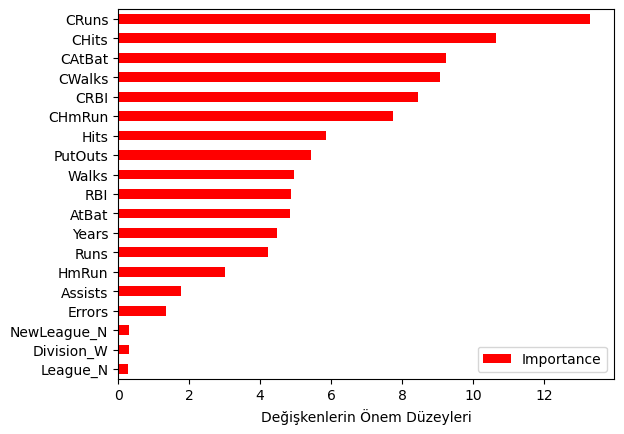

In [110]:
Importance.sort_values(by="Importance",
                       axis=0,
                       ascending=True).plot(kind = "barh",
                                            color = "r")

plt.xlabel("Değişkenlerin Önem Düzeyleri");

# Gradient Boosting Machines

In [113]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [114]:
from sklearn.ensemble import GradientBoostingRegressor

In [115]:
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor()

## Tahmin

In [116]:
y_pred = gbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

353.03846495135883

## Model Tuning

In [117]:
gbm_params = {'learning_rate': [0.001, 0.01, 0.1, 0.2], 
              'max_depth': [3, 5, 8, 50, 100], 
              'n_estimators': [200, 500, 1000, 2000], 
              'subsample': [1, 0.5, 0.75],}

In [118]:
gbm = GradientBoostingRegressor()
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs=-1, verbose=2)
gbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 8, 50, 100],
                         'n_estimators': [200, 500, 1000, 2000],
                         'subsample': [1, 0.5, 0.75]},
             verbose=2)

In [136]:
gbm_cv_model.best_params_

{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 2000, 'subsample': 0.75}

In [137]:
gbm_tuned = GradientBoostingRegressor(learning_rate=0.2, 
                                      max_depth=3, 
                                      n_estimators=2000, 
                                      subsample=0.75)

gbm_tuned = gbm_tuned.fit(X_train, y_train)

In [138]:
y_pred = gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

334.20016466303775

In [139]:
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100}, index = X_train.columns)

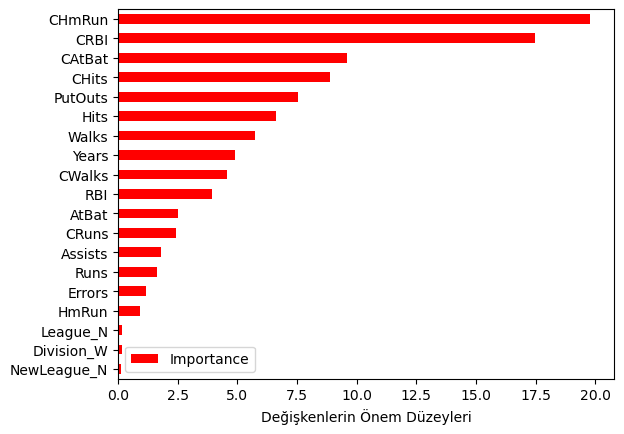

In [140]:
Importance.sort_values(by="Importance",
                       axis=0,
                       ascending=True).plot(kind = "barh",
                                            color = "r")

plt.xlabel("Değişkenlerin Önem Düzeyleri");

# XGBoost

In [159]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [160]:
#!pip install xgboost

In [161]:
import xgboost as xgb

In [162]:
DM_train = xgb.DMatrix(data = X_train, label = y_train)
DM_test = xgb.DMatrix(data = X_test, label = y_test)

In [163]:
from xgboost import XGBRegressor

In [164]:
xgb_model = XGBRegressor().fit(X_train, y_train)

## Tahmin

In [165]:
y_pred = xgb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

366.3863437634965

## Model Tuning

In [166]:
xgb_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [167]:
xgb_grid = {
            'colsample_bytree': [0.4, 0.5, 0.6, 0.9, 1], 
            'n_estimators': [100, 200, 500, 1000], 
            'max_depth': [2, 3, 4, 5, 6], 
            'learning_rate': [0.1, 0.01, 0.5]
}

In [168]:
xgb = XGBRegressor()

xgb_cv = GridSearchCV(xgb, 
                      param_grid=xgb_grid, 
                      cv=10, 
                      n_jobs=-1, 
                      verbose = 2)

xgb_cv.fit(X_train, y_train)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None,...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6, 0.9, 1],
                         'learning_rate': [0.1, 0.01, 0.5],
                         'max_depth': [2, 3, 4, 5, 6],
                         'n_estimators': [100, 200, 500, 1000]},
             verbose=2)

In [169]:
xgb_cv.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 100}

In [171]:
xgb_tuned = XGBRegressor(colsample_bytree = 0.4, 
                         learning_rate = 0.1, 
                         max_depth = 6, 
                         n_estimators = 100)

xgb_tuned = xgb_tuned.fit(X_train, y_train)

In [172]:
y_pred = xgb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

343.6101991802883

# Light GBM

In [173]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [175]:
#!pip install lightgbm

In [176]:
from lightgbm import LGBMRegressor

In [179]:
lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000064 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 831
[LightGBM] [Info] Number of data points in the train set: 197, number of used features: 19
[LightGBM] [Info] Start training from score 543.483442
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

## Tahmin

In [180]:
y_pred = lgbm_model.predict(X_test, num_iteration=lgbm_model.best_iteration_)

In [181]:
np.sqrt(mean_squared_error(y_test, y_pred))

363.8712087611089

In [182]:
lgbm_model

LGBMRegressor()

## Model Tuning

In [185]:
lgbm_grid = {'colsample_bytree': [0.4, 0.5, 0.6, 0.9, 1], 
             'learning_rate': [0.01, 0.1, 0.5, 1], 
             'n_estimators': [20, 40, 100, 200, 500, 1000], 
             'max_depth': [1,2,3,4,5,6,7,8]}

lgbm = LGBMRegressor()
lgbm_cv_model = GridSearchCV(lgbm, lgbm_grid, cv = 10, n_jobs = -1, verbose=2)

In [186]:
lgbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 960 candidates, totalling 9600 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000063 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 831
[LightGBM] [Info] Number of data points in the train set: 197, number of used features: 19
[LightGBM] [Info] Start training from score 543.483442
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

GridSearchCV(cv=10, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6, 0.9, 1],
                         'learning_rate': [0.01, 0.1, 0.5, 1],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [20, 40, 100, 200, 500, 1000]},
             verbose=2)

In [187]:
lgbm_cv_model.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 20}

In [193]:
lgbm_tuned = LGBMRegressor(learning_rate=0.1, 
                           max_depth=6, 
                           n_estimators=40, 
                           colsample_bytree=0.5)

lgbm_tuned = lgbm_tuned.fit(X_train, y_train)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000051 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 831
[LightGBM] [Info] Number of data points in the train set: 197, number of used features: 19
[LightGBM] [Info] Start training from score 543.483442
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

In [194]:
y_pred = lgbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


375.0176683409679

# CatBoost

In [93]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [94]:
#!pip install catboost

In [95]:
from catboost import CatBoostRegressor

In [97]:
catb = CatBoostRegressor()
catb_model = catb.fit(X_train, y_train)

Learning rate set to 0.031674
0:	learn: 437.6430699	total: 874us	remaining: 873ms
1:	learn: 431.3923642	total: 1.65ms	remaining: 825ms
2:	learn: 424.8820360	total: 2.36ms	remaining: 784ms
3:	learn: 418.2514904	total: 3.11ms	remaining: 775ms
4:	learn: 412.6394021	total: 3.82ms	remaining: 761ms
5:	learn: 406.6247020	total: 4.65ms	remaining: 771ms
6:	learn: 400.5321206	total: 5.71ms	remaining: 809ms
7:	learn: 394.6683437	total: 6.74ms	remaining: 836ms
8:	learn: 388.2496484	total: 7.67ms	remaining: 844ms
9:	learn: 382.9448842	total: 8.71ms	remaining: 862ms
10:	learn: 377.2600080	total: 9.64ms	remaining: 867ms
11:	learn: 372.4829606	total: 10.5ms	remaining: 862ms
12:	learn: 366.6823437	total: 11.2ms	remaining: 849ms
13:	learn: 362.6076230	total: 12.1ms	remaining: 852ms
14:	learn: 358.0107745	total: 12.8ms	remaining: 842ms
15:	learn: 353.2802665	total: 13.7ms	remaining: 843ms
16:	learn: 348.5646265	total: 14.5ms	remaining: 839ms
17:	learn: 343.6407912	total: 15.3ms	remaining: 834ms
18:	learn

## Tahmin

In [105]:
y_pred = catb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

351.194631344607

## Model Tuning

In [99]:
catb_grid = {'iterations': [200, 500, 1000, 2000], 
             'learning_rate': [0.01, 0.03, 0.05, 0.08, 0.1], 
             'depth': [3,4,5,6,7,8]}

In [100]:
catb = CatBoostRegressor()
catb_cv_model = GridSearchCV(catb, catb_grid, cv=5, n_jobs=-1, verbose=2)

In [101]:
catb_cv_model.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0:	learn: 422.4143448	total: 639us	remaining: 639ms
1:	learn: 404.1864276	total: 1.26ms	remaining: 630ms
2:	learn: 386.3231718	total: 1.77ms	remaining: 590ms
3:	learn: 370.5548032	total: 2.31ms	remaining: 576ms
4:	learn: 354.9242038	total: 2.77ms	remaining: 551ms
5:	learn: 342.3403984	total: 3.24ms	remaining: 537ms
6:	learn: 328.2370070	total: 3.77ms	remaining: 535ms
7:	learn: 317.5056526	total: 4.27ms	remaining: 529ms
8:	learn: 306.6243511	total: 4.94ms	remaining: 544ms
9:	learn: 297.3147023	total: 5.48ms	remaining: 543ms
10:	learn: 288.3685892	total: 5.93ms	remaining: 533ms
11:	learn: 281.0996220	total: 6.42ms	remaining: 529ms
12:	learn: 273.2254898	total: 6.94ms	remaining: 527ms
13:	learn: 266.9003385	total: 7.42ms	remaining: 523ms
14:	learn: 261.9092500	total: 7.88ms	remaining: 517ms
15:	learn: 256.2637350	total: 8.34ms	remaining: 513ms
16:	learn: 250.3667935	total: 8.78ms	remaining: 508ms
17:	learn: 244.8631098	total: 

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x000001D5DB898110>,
             n_jobs=-1,
             param_grid={'depth': [3, 4, 5, 6, 7, 8],
                         'iterations': [200, 500, 1000, 2000],
                         'learning_rate': [0.01, 0.03, 0.05, 0.08, 0.1]},
             verbose=2)

In [102]:
catb_cv_model.best_params_

{'depth': 5, 'iterations': 1000, 'learning_rate': 0.1}

In [103]:
catb_tuned = CatBoostRegressor(iterations = 1000, 
                               learning_rate = 0.1, 
                               depth = 5)

catb_tuned = catb_tuned.fit(X_train, y_train)

0:	learn: 422.4143448	total: 1.05ms	remaining: 1.05s
1:	learn: 404.1864276	total: 1.82ms	remaining: 911ms
2:	learn: 386.3231718	total: 2.33ms	remaining: 775ms
3:	learn: 370.5548032	total: 2.94ms	remaining: 731ms
4:	learn: 354.9242038	total: 3.63ms	remaining: 722ms
5:	learn: 342.3403984	total: 4.16ms	remaining: 690ms
6:	learn: 328.2370070	total: 4.7ms	remaining: 666ms
7:	learn: 317.5056526	total: 5.23ms	remaining: 649ms
8:	learn: 306.6243511	total: 5.74ms	remaining: 633ms
9:	learn: 297.3147023	total: 6.25ms	remaining: 619ms
10:	learn: 288.3685892	total: 6.75ms	remaining: 607ms
11:	learn: 281.0996220	total: 7.21ms	remaining: 593ms
12:	learn: 273.2254898	total: 7.7ms	remaining: 585ms
13:	learn: 266.9003385	total: 8.57ms	remaining: 604ms
14:	learn: 261.9092500	total: 9.03ms	remaining: 593ms
15:	learn: 256.2637350	total: 9.83ms	remaining: 604ms
16:	learn: 250.3667935	total: 10.3ms	remaining: 596ms
17:	learn: 244.8631098	total: 10.8ms	remaining: 589ms
18:	learn: 240.1540669	total: 11.3ms	rem

In [106]:
y_pred = catb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

356.665762904938